# <center>Analyse de données tendance_centrale<center>

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Chargement du fichier

In [2]:
tendanceCentrale = pd.read_csv("data/tendance_centrale.csv")

## Analyse du fichier

In [3]:
tendanceCentrale.info()
tendanceCentrale

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nom     17 non-null     object 
 1   Age     17 non-null     int64  
 2   Rating  17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 536.0+ bytes


,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


### Découpage des données

In [4]:
noms = tendanceCentrale.iloc[:, 0]
ages = tendanceCentrale.iloc[:, 1]
ratings = tendanceCentrale.iloc[:, 2]

## Mesure tendance centrale

### Ages

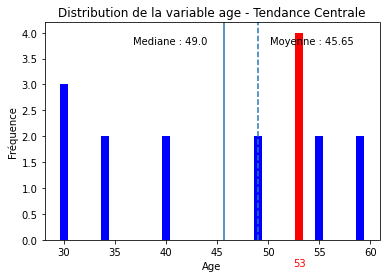

In [5]:
# Récupération des valeurs utiles à la tendance centrale
agesMean = ages.mean()
agesMedian = ages.median()
agesMode = ages.mode()

# Mise en évidence du mode
distributionAges = ages.value_counts()
couleurs = ["blue"]*distributionAges.size
couleurs[0] = "red"

# Annotation du diagramme
plt.title("Distribution de la variable age - Tendance Centrale")
plt.xlabel("Age")
plt.ylabel("Fréquence")

# Affichage de l'histogramme
plt.bar(distributionAges.index, distributionAges, color=couleurs)

# Récupération des bornes verticales de la figure
yMin, yMax = plt.ylim()

# Affichage des valeurs de la tendance centrale

## Moyenne
plt.axvline(agesMean)
plt.text(agesMean*1.1, yMax*0.9, f"Moyenne : {round(agesMean, 2)}")

## Médiane
plt.axvline(agesMedian, linestyle="dashed")
plt.text(agesMedian*0.75, yMax*0.9, f"Mediane : {round(agesMedian, 2)}")

## Mode
plt.text(agesMode*0.99, -0.5, f"{agesMode[0]}", color="red")

# Affichage de la figure obtenue
plt.show()

### Ratings

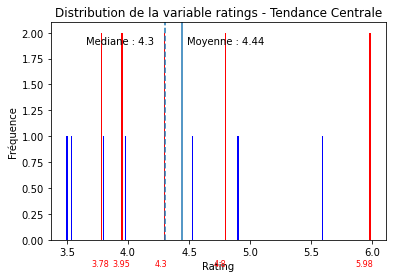

In [6]:
# Récupération des valeurs utiles à la tendance centrale
ratingsMean = ratings.mean()
ratingsMedian = ratings.median()
ratingsMode = ratings.mode()

# Mise en évidence des modes
distributionRatings = ratings.value_counts()
couleurs = ["blue"]*distributionRatings.size
n = ratingsMode.size
couleurs[:n] = ["red" for i in range(n)]

# Annotation du diagramme
plt.title("Distribution de la variable ratings - Tendance Centrale")
plt.xlabel("Rating")
plt.ylabel("Fréquence")

# Affichage de l'histogramme
plt.bar(distributionRatings.index, distributionRatings, color=couleurs, width = 0.01)

# Récupération des bornes verticales de la figure
yMin, yMax = plt.ylim()

# Affichage des valeurs de la tendance centrale

## Moyenne
plt.axvline(ratingsMean)
plt.text(ratingsMean*1.01, yMax*0.9, f"Moyenne : {round(ratingsMean, 2)}")

## Médiane
plt.axvline(ratingsMedian, linestyle="dashed")
plt.text(ratingsMedian*0.85, yMax*0.9, f"Mediane : {round(ratingsMedian, 2)}")

## Modes
for mode in ratingsMode:
    plt.text(mode*0.98, -0.25, f"{round(mode, 2)}", size=8, color="red")

# Affichage de la figure obtenue
plt.show()

## Analyse de la variance

### Calcul de la variance

In [7]:
np.var(tendanceCentrale[["Age", "Rating"]])

Age       108.228374
Rating      0.602940
dtype: float64

### Création des groupes en fonction de l'âge

In [8]:
ageGroup = tendanceCentrale.groupby("Age")
ageGroupList = [ageGroup.get_group(age)["Rating"] for age in tendanceCentrale["Age"].unique()]

### ANOVA

In [9]:
# Utilisation de la librairie scipy
fvalue, pvalue = stats.f_oneway(*(ageGroupList))
print(fvalue, pvalue)

# Utilisation de la librairie statsmodels et du modèle Modèle Ordinary Least Squares (OLS)
model = ols('Rating ~ C(Age)', data=tendanceCentrale).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

2.6464342372301703 0.08370350483249943


,df,sum_sq,mean_sq,F,PR(>F)
C(Age),6.0,6.289185,1.048197,2.646434,0.083704
Residual,10.0,3.960792,0.396079,NaN,NaN


Après analyse de la variance, la valeur PR nous permet d'avancer qu'un modèle prédictif des notes en fonction de l'âge aura une erreur de plus de 8%.